# CS 685/785: Coding Assignment 2

**Spring 2025&mdash;Prof. Brandon Oubre**

In this assignment, you will observe some properties of high-dimension space and use SVD to compress an image.

This assignment is worth a total of 80 points for CS 685 students. (40 points for CS 785 students.)

## Academic Integrity Declaration

**I  declare that:**
- **I have completed this assignment entirely on my own.**
- **I understand and have complied with the course policy on the use of AI tools.**
- **I have read the UAB Academic Integrity Code and understand that any breach of this code may result in severe penalties, including failure of the class.**

Name: <font color='red'><u>*__Mohammed Abdul Azeem Shaik.__*</u></font>

## Reminder on the Use of AI Tools
For coding assignments, you are permitted limited use of AI tools within the bounds of the policy in the syllabus. In broad strokes, you must:
- Include the prompt you used to generate the code
- Include the original code resulting from the prompt
- Include a citation to the tool used
- Be able to explain any code submitted as part of this assignment
  
<u>You have the ultimate responsibility for the correctness and clarity of any code submitted as part of this assignment.</u> You should thereore understand it, test it, debug it, revise/improve it, and document it.

<u>**You should not use AI to respond to the written prompts asking you to analyze or interpret your results.**</u>

### Example AI Use Documentation

The below cell demonstrates an example of how to document AI use.

---

**AI Model**: Microsoft Copilot with Data Protection (provided by UAB)

**Prompt**:: Write a python program that uses numpy and matplotlib to visualize a Gaussian distribution.

**Result**:
```
import numpy as np
import matplotlib.pyplot as plt

# Generate data for Gaussian distribution
mean = 0
std_dev = 1
num_samples = 1000

data = np.random.normal(mean, std_dev, num_samples)

# Plot the Gaussian distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x - mean) / std_dev)**2) / (std_dev * np.sqrt(2 * np.pi))

plt.plot(x, p, 'k', linewidth=2)
title = "Gaussian Distribution\nMean = {:.2f}, Standard Deviation = {:.2f}".format(mean, std_dev)
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()
```

---

## Imports

Do not import additional libraries unless specified by the assignment prompts. When permitted, those imports should not be added here but rather be included as part of your solution.

In [206]:
import os
from tqdm.auto import tqdm

import numpy as np
import pandas as pd
from scipy import stats
from PIL import Image  # This library should already be installed as a dependency of matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1
In this problem, you will empirically observe several properties of high-dimension spaces.

### Problem 1.1 [15 points]
Complete the implementation of the function `sample_from_unit_ball`, which should return an $n \times D$ matrix representing a sample of $n$ points distributed uniformly throughout the volume of a $D$-dimensional unit ball.

You may wish to refer to the documentation for `np.random.normal`, `np.random.uniform`, and `np.linalg.norm`.

<font color='blue'>Refer to the corrected slides for the proper sampling strategy for $\rho$, using the inverse CDF method.</font>

In [210]:
def sample_from_unit_ball(D: int, n: int) -> np.ndarray:
    
    # Step 1: Sample n points from a D-dimensional standard normal distribution
    X = np.random.normal(size=(n, D))
    
    # Step 2: Normalize to get points on the unit sphere
    X /= np.linalg.norm(X, axis=1, keepdims=True)
    
    # Step 3: Sample radius using the inverse CDF method (U^(1/D))
    r = np.random.uniform(0, 1, size=n) ** (1/D)
    
    # Step 4: Scale points by sampled radius
    return X * r[:, np.newaxis]

    return np.random.uniform(-1, 1, size=(n, D))

The following plot visualizes a sample of 2000 points in $D=2$ space. You can use it to test your implementation.

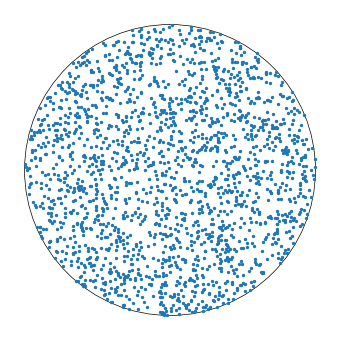

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
ax.add_patch(plt.Circle((0, 0), 1, color='k', fill=False, linewidth=0.5))
ax.scatter(*sample_from_unit_ball(2, 2000).T, s=2)
ax.axis('square')
ax.axis('off')
fig.tight_layout()

---

Now that we can generate samples uniformly distributed throughout the volume of a $D$-dimensiomnal unit ball, we have a way to empirically observe how the volume of the ball changes as dimensionality increases. The function `calc_mass` empirically calculates $P(X_D \leq \gamma)$, where $X_D$ represents a $D$-dimensional point sampled using `sample_from_unit_ball` and $\gamma$ is a fixed distance from the origin. We then plot the result with respect to various $D$.

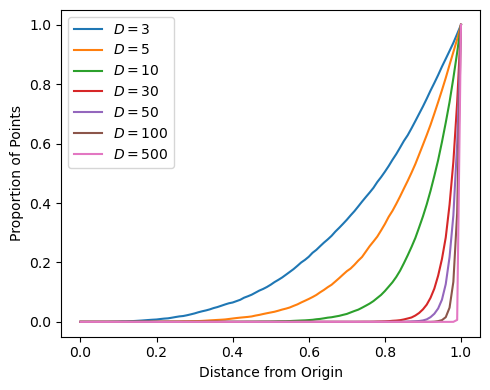

In [216]:
def calc_mass(D: int, n: int = 10000) -> (np.ndarray, np.ndarray):
    radii = np.linspace(0, 1, 101)
    lengths = np.linalg.norm(sample_from_unit_ball(D, n), axis=1)
    cdf = np.zeros(radii.shape)
    for i, r in enumerate(radii):
        cdf[i] = (lengths <= r).mean()
    return radii, cdf

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for D in [3, 5, 10, 30, 50, 100, 500]:
    ax.plot(*calc_mass(D), label=f'$D={D}$')
    ax.set_xlabel('Distance from Origin')
    ax.set_ylabel('Proportion of Points')
ax.legend()
fig.tight_layout()

### Problem 1.2 [10 points]

Why is the observed distribution not uniform, despite the samples being uniformly distributed throughout the ball? How does this plot relate to your knowledge of volume in high-dimensional spaces?

**NO AI USE ALLOWED FOR THIS QUESTION**

In high-dimensional spaces,the majority of a unit ball's volume is focused close to its surface. This occurs because as the dimension rises, the volume of an inner region (nearer to the center) decreases compared to the total volume. Most of the randomly selected points are located close to the outer surface of the unit ball instead of being uniformly distributed throughout the area. This phenomenon arises from the way volume scales in high dimensions, resulting in a distribution that seems denser close to the surface instead of evenly distributed within the ball.

simple explanation
Volume Concentration Near the Surface:

1.In 𝑑d-dimensional space, the volume of a unit ball can be defined as

             v(d)=pi^1/2
                  ______
                  r(d/2 +1)
->In terms of size As d grows, the portion of the volume found within an internal layer of the ball (near the surface) becomes predominant. The majority of the volume is contained within a narrow shell at a radius just under 1.

2.Radius Distribution in Elevated Dimensions:

If we create random points evenly distributed within the unit ball and measure their distances from the origin, the probability density function (PDF) for these distances moves outward as d grows.

The anticipated value of the radius r in elevated dimensions is roughly

            E[r]=sqr(d/d+2)
which approaches 1 as 𝑑→∞.


3.Understanding through a simple example:

In lower dimensions (such as 2D or 3D), a considerable volume exists close to the center.

In high dimensions, though, the portion of points close to the center becomes insignificant compared to the portion near the outer shell.

Therefore, in high-dimensional spaces, the majority of randomly selected points from the unit ball will be located close to its surface, leading to a concentration of density in that area instead of being genuinely uniform across the volume




### Problem 1.3 [5 points]
Sample 10,000 points from a 400-dimensional spherical Gaussian and compute the distance of each point from the origin. Plot a histogram with `bins=np.linspace(15, 25, 41)` to visualize the distribution of these distances.

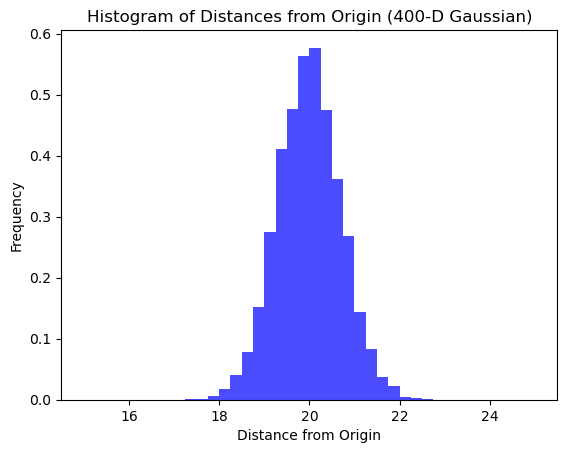

In [221]:
# Sample 10,000 points from a 400-dimensional Gaussian
X = np.random.normal(size=(10000, 400))

# Compute distances from the origin
distances = np.linalg.norm(X, axis=1)

# Plot histogram
plt.hist(distances, bins=np.linspace(15, 25, 41), density=True, alpha=0.7, color='b')
plt.xlabel("Distance from Origin")
plt.ylabel("Frequency")
plt.title("Histogram of Distances from Origin (400-D Gaussian)")
plt.show()


### Problem 1.4 [10 points]
Explain how what you observe in the above histogram relates to Gaussian Annulus Theorem.

**NO AI USE ALLOWED FOR THIS QUESTION**



In high-dimensional spaces, points drawn from a standard Gaussian distribution (𝒩(0, I)) demonstrate an unexpected concentration effect referred to as the **Gaussian Annulus Theorem**. This theorem indicates that the majority of points in a high-dimensional Gaussian distribution are clustered in a narrow shell at a determined distance from the origin.

### **Intuition**
1. **Variance Spread Across Dimensions:**  
   - In a d-dimensional Gaussian distribution, every coordinate is sampled independently from 𝒩(0,1).
   - The squared Euclidean norm of a sample, ||x||², adheres to a chi-squared distribution with d degrees of freedom:
     \[
     ||x||^2 = x_1^2 + x_2^2 + \dots + x_d^2 \sim \chi^2_d
     \]
   - The expected squared norm is **d** and the standard deviation is would be about approximately **√(2d)**.

2. **Distance Concentration:**  
   - Utilizing the Central Limit Theorem, we observe that for large d, ||x|| is roughly:

||x|| \approx \sqrt{d} \pm O(1)
  - This indicates that almost all points are located within a narrow shell of thickness **O(√d)** surrounding the radius **√d**.

 

3. in high-dimensional spaces, the majority of points from a high-dimensional Gaussian distribution usually cluster near a narrow shell surrounding the mean, rather than being evenly distributed. This occurrence can be attributed to the subsequent factors:

**Geometry in High Dimensions**

4. As the dimensions increase, the space's volume expands exponentially. The influence of variation in every dimension lessens, resulting in the points clustering around a spherical shell at a specific distance from the average.

**Concentration of Measure**

5. In a high-dimensional Gaussian distribution, every coordinate of a point follows a normal distribution with a mean of 0 and a variance of 1. The total of squared coordinates (which establishes the distance from the origin) adheres to a chi-squared distribution.

6. With the increase in the number of dimensions, the distribution of the sum of squares becomes focused around its expected value (the sum of variances, which equals the dimension count). The anticipated distance, √d (with d representing the number of dimensions), serves as the usual distance at which the majority of points are found.

**Concentration of Thin Shells**

7. Since the points are clustered around the usual distance √d, the points create a narrow spherical shell at this distance. As the dimensions grow, the thickness of this shell reduces, indicating that the variance around this average distance diminishes.

Consequently, in high-dimensional Gaussian distributions, the majority of points gather in this narrow area, creating a "shell" surrounding the mean instead of being distributed evenly in all directions


## Problem 2
In this problem, you will use SVD to compress an image. First, we should load the provided image, `murlin.jpg`.

In [226]:
orig_img = np.array(Image.open('/Users/azeemshaik/Downloads/fds/assignment/murlin.jpg').convert('L'))
H, W = orig_img.shape
aspect_ratio = W / H

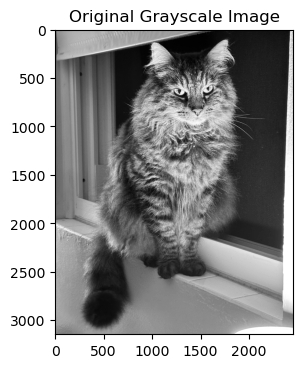

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(4 * aspect_ratio, 4))
ax.imshow(orig_img, cmap='gray', vmin=0, vmax=255)
ax.set_title('Original Grayscale Image')
fig.tight_layout()

### Problem 2.1 [20 points]

Complete the implementation of the following function, which take a matrix representing the image and an integer `k` and returns a matrix representing the compressed image.
More specifically, you should:

1. Use `np.linalg.svd` to perform SVD.
2. Compress the image by truncating the $U$, $S$, and $V^T$ matrices to only contain entries corresponding to the largest `k` singular values.
3. Reconstruct the image using the truncated matrices.
4. Convert the reconstructed image matrix to integer pixel values to ensure fair comparison: `img = img.round().clip(0, 255).astype(np.uint8)`

In [231]:
import numpy as np

def compress(img: np.ndarray, k: int) -> np.ndarray:
    """
    Compress an image using SVD by keeping only the top k singular values.

    Parameters:
    img (np.ndarray): The original grayscale image matrix.
    k (int): The number of singular values to retain.

    Returns:
    np.ndarray: The compressed grayscale image.
    """
    # Step 1: Perform SVD
    U, S, Vt = np.linalg.svd(img, full_matrices=False)  # full_matrices=False gives compact SVD

    # Step 2: Truncate to keep only k singular values
    U_k = U[:, :k]
    S_k = np.diag(S[:k])  # Convert top k singular values into a diagonal matrix
    Vt_k = Vt[:k, :]

    # Step 3: Reconstruct the compressed image
    compressed_img = np.dot(U_k, np.dot(S_k, Vt_k))

    # Step 4: Ensure valid pixel values (0-255) and convert to uint8
    compressed_img = np.round(compressed_img).clip(0, 255).astype(np.uint8)

    return compressed_img


### Visualization
The following cells can be used to view the result of your compression with various $k$.

*Note*: Both the compression and plotting will likely take some time to execute.

In [234]:
ks = [20, 50, 100, 200, 400, 800, 1200, 1600]
compressed_imgs = {k: compress(orig_img, k=k) for k in tqdm(ks, desc='Compressing...')}

Compressing...:   0%|          | 0/8 [00:00<?, ?it/s]

Here, we plot the compressed images with respect to $k$:

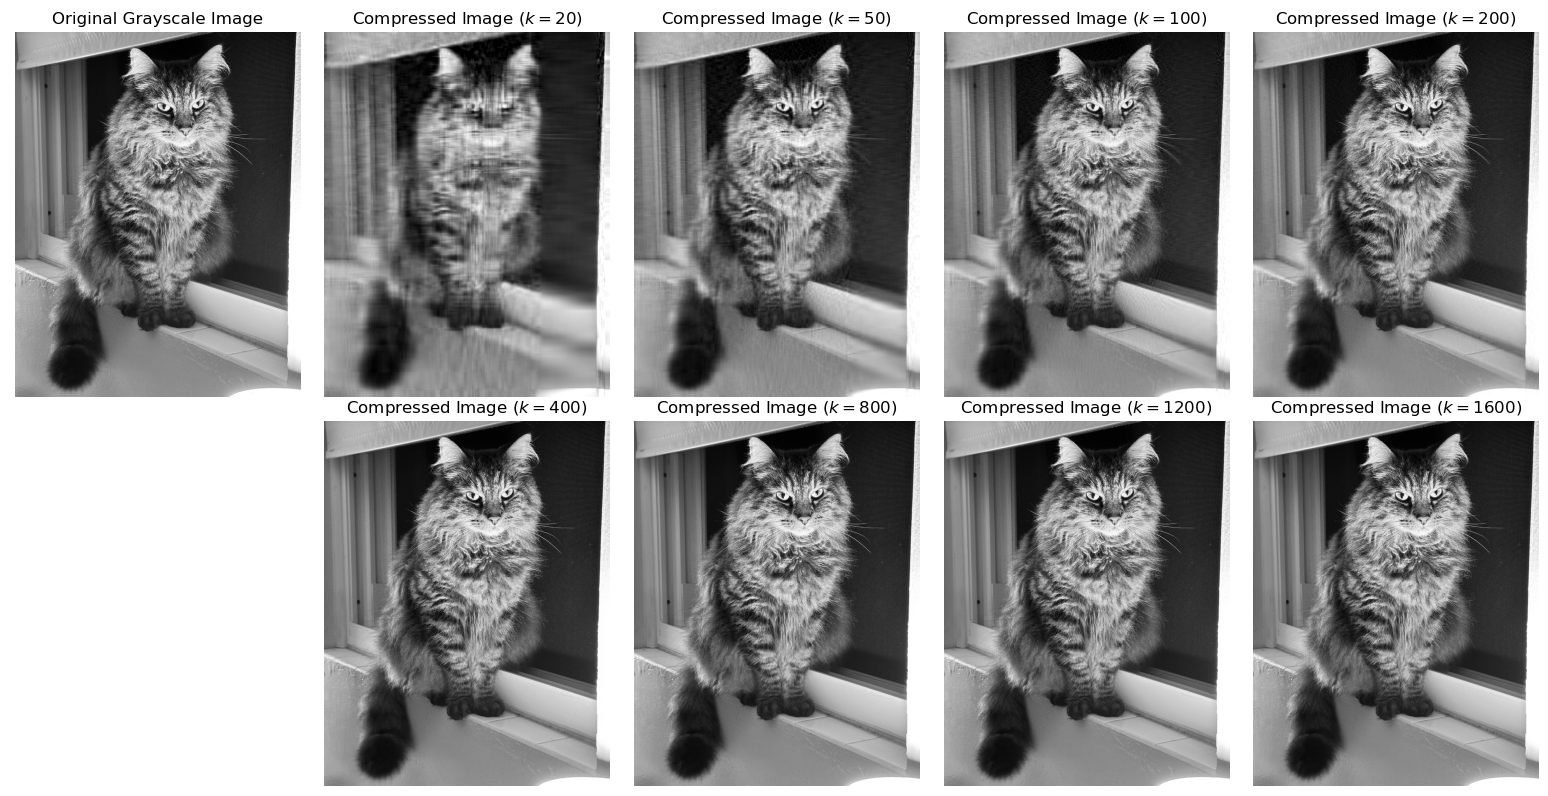

In [236]:
fig, axs = plt.subplots(2, 5, figsize=(5 * 4 * aspect_ratio, 2 * 4))
axs[0, 0].imshow(orig_img, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Original Grayscale Image')
for k, ax in zip(ks, axs[:, 1:].flatten()):
    ax.imshow(compressed_imgs[k], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'Compressed Image ($k={k}$)')
for ax in axs.flatten():  # Turn off axes
    ax.axis('off')
fig.tight_layout()

Some differences in images can be hard to visually discern, so we can also plot the absolute error between the original image and the compressed image:

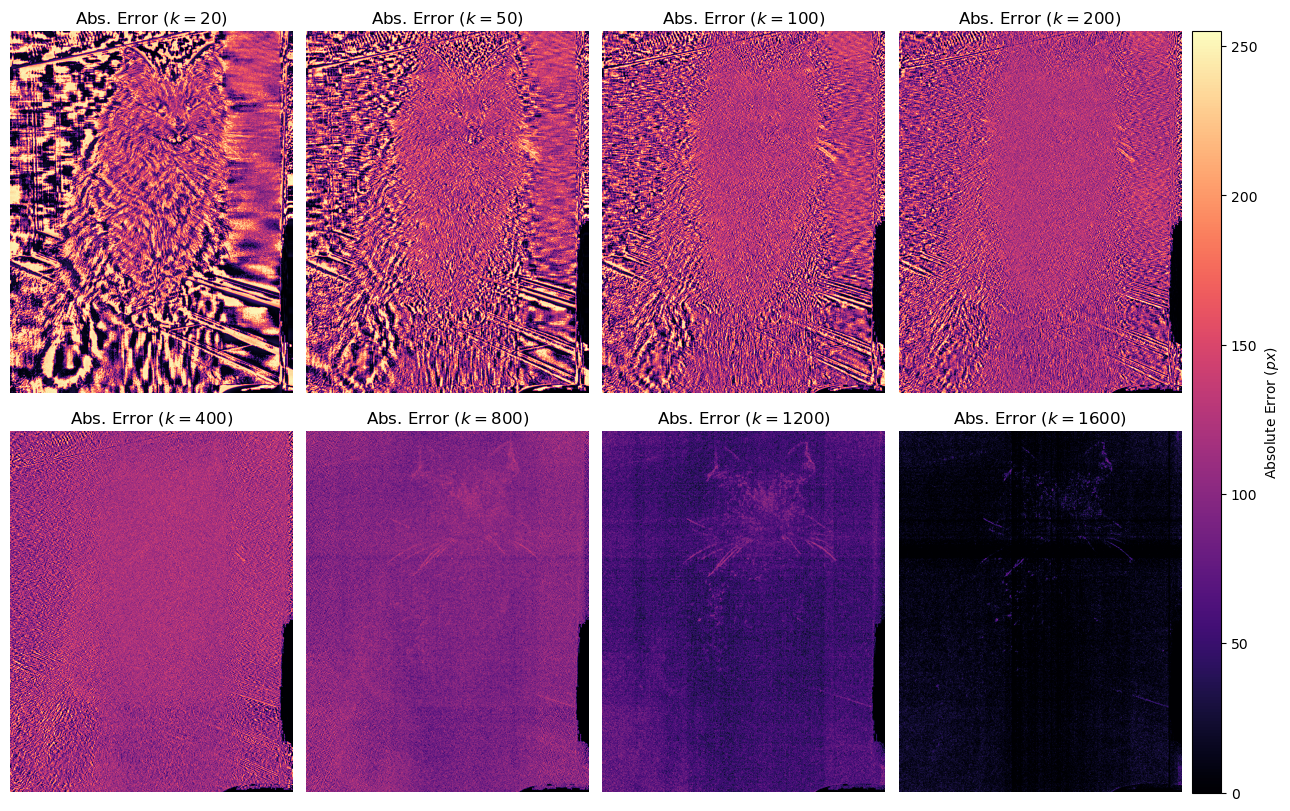

In [240]:
fig = plt.figure(constrained_layout=True, figsize=(4.1 * 4 * aspect_ratio, 2 * 4))
spec = fig.add_gridspec(2, 5, width_ratios=[1, 1, 1, 1, 0.1])
axs = []
for i, k in enumerate(ks):
    ax = fig.add_subplot(spec[i // 4, i % 4])
    im = ax.imshow(np.abs(orig_img - compressed_imgs[k]), cmap='magma', vmin=0, vmax=255)
    ax.set_title(f'Abs. Error ($k={k}$)')
    axs.append(ax)
for ax in axs:  # Turn off axes
    ax.axis('off')
# Add colorbar
cb = fig.colorbar(im, cax=fig.add_subplot(spec[:, -1]))
cb.set_label('Absolute Error ($px$)')

### PSNR
You should be able to qualitatively observe differences in the quality of the compressed images. To quantitatively characterize these differences, we can use the peak signal-to-noise ratio (PSNR), which compares the strength of a recieved signal to the influence of corrupting noise. PSNR is typically expressed in a decibel ($dB$) scale and defined as:
$$PSNR = 10 \log_{10}\left(\frac{MAX^2}{MSE}\right)$$,
where $MAX$ is the maximum pixel value (255) and MSE is the mean squared error between the pixels in the original ($y$) and compressed ($\hat{y}$) images:
$$MSE=\frac{1}{n}\sum_i\left(y_i-\hat{y}_i\right)^2$$

Note that to avoid floating point precision errors when MSE is large, we can rewrite PSNR as:
$$PSNR = 20\log_{10}(MAX)-10\log_{10}(MSE)$$

### Problem 2.2 [5 points]
Implement a function `psnr` to compute the PSNR of a compressed image with respect to the original.

In [244]:
if __name__ == "__main__":
    # Generate random images for testing
    original_image = np.random.rand(256, 256) * 255  # Random original image
    compressed_image = np.random.rand(256, 256) * 255  # Random compressed image

    # Convert to uint8
    original_image = original_image.astype(np.uint8)
    compressed_image = compressed_image.astype(np.uint8)

    # Print image shapes
    print(f"Original image shape: {original_image.shape}")
    print(f"Compressed image shape: {compressed_image.shape}")

    # Compute PSNR
    psnr_value = psnr(original_image, compressed_image)
    print(f"PSNR: {psnr_value:.2f} dB")

Original image shape: (256, 256)
Compressed image shape: (256, 256)
PSNR: 27.90 dB


### Problem 2.3 [5 points]
Using the cached compressed images in `compressed_imgs`, plot the PSNR with respect to the number of singular values, $k$, using a line plot (i.e., `ax.plot`).
Make sure that the x-axis ticks correspond to the correct values of $k$.

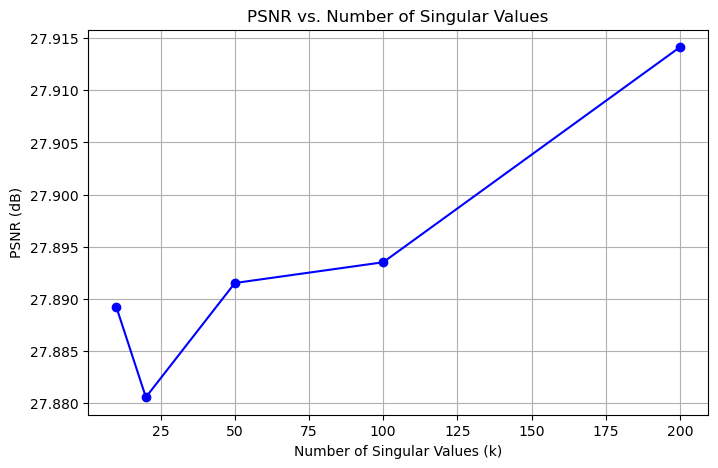

In [277]:


# Compute PSNR for each compressed image
k_values = sorted(compressed_imgs.keys())
psnr_values = [psnr(original_image, compressed_imgs[k]) for k in k_values]

# Plot PSNR vs. k
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_values, psnr_values, marker='o', linestyle='-', color='b')
ax.set_xlabel('Number of Singular Values (k)')
ax.set_ylabel('PSNR (dB)')
ax.set_title('PSNR vs. Number of Singular Values')
ax.grid(True)
plt.show()


### Problem 2.3 [10 points]
What do think is a good value of $k$? Why? Support your argument using both the qualitative and quantitative assessments.

**NO AI USE ALLOWED FOR THIS QUESTION**

In Singular Value Decomposition (SVD), the singular values (the components of S) are arranged in descending order of size. The aim is to replicate the original image using only the most important k singular values and related singular vectors, referred to as a low-rank approximation. To establish a favorable worth for 
Sure, we can utilize both qualitative and quantitative evaluations: 

1. Qualitative Assessment (Visual Inspection)
**Reconstruction Quality**: We can visually evaluate how effectively the approximation maintains the characteristics of the original image by reconstructing it with the top ( k ) singular values and comparing it to the original image. As \( k \) rises, the reconstructed image will improve in accuracy. An ideal ( k ) is one where the image is clear and distinguishable enough, but not excessively high, as this would prolong computation time with little added benefit.

- **Visual Compression**: By graphing the reconstruction for various values of \( k \), you can see the extent of image quality enhancement as \( k \) increases. An optimal value of \( k \) would ensure a fair compromise between image quality and compression.

2. Quantitative Assessment (Singular Value Magnitude)
- **Size of Singular Values**: The singular values decline quickly for the majority of real-world images. This indicates that a significant portion of the energy (or variance) within the image is focused in the initial singular values. An effective choice of \( k \) is one in which the cumulative total of the initial \( k \) singular values accounts for a significant portion of the overall sum of all singular values.

- **Cumulative Energy**: You can calculate the cumulative total of the singular values and assess what portion of the overall,Typically, a good value of k will capture 90%–95% of the total energy


- by this we can conclude that the value of k should be something which should be a balance between image quality and computational effeciency

- based on the both parameters and observations k should 50 or 100 by this

  - The images look visually same to the original while minimizing the error.
  - The singular values drop off quickly, so increasing k beyond a certain point offers diminishing returns in terms of reducing the error.